# StackOverflow EDA - Questions
This document performs some exploritory analysis on the non-text files for all questions up to December 2017 data cut.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from collections import Counter
import numpy as np
import re
from itertools import chain
from scipy.spatial.distance import cosine
file_path = "/Volumes/DockerDrive/"

###### Loading Dataset 
`Question_info.csv` (1.3G)

In [3]:
%%time
questions = pd.read_csv(file_path+"question_info.csv", index_col="CreationDate", 
                        parse_dates=["CreationDate", "LastActivityDate", "ClosedDate"])

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


In [4]:
questions.head()

,Id,Tags,LastActivityDate,ClosedDate,AnswerCount,CommentCount,FavoriteCount,ViewCount,Score,AcceptedAnswerId,OwnerUserId
CreationDate,,,,,,,,,,,
2008-07-31 21:42:52.667,4,<c#><winforms><type-conversion><decimal><opacity>,2017-09-27 05:52:59.927,NaT,13,1,37,33648,528,7,8
2008-07-31 22:08:08.620,6,<html><css><css3><internet-explorer-7>,2016-03-19 06:10:52.170,NaT,5,0,9,15363,231,31,9
2008-07-31 23:40:59.743,9,<c#><.net><datetime>,2017-11-07 11:12:32.963,NaT,61,10,356,417633,1624,1404,1
2008-07-31 23:55:37.967,11,<c#><datetime><time><datediff><relative-time-s...,2017-09-04 01:27:10.793,NaT,34,3,526,126480,1234,1248,1
2008-08-01 00:42:38.903,13,<javascript><html><browser><timezone><timezone...,2017-07-31 11:30:41.573,NaT,24,4,127,146275,512,0,9


In [5]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14995834 entries, 2008-07-31 21:42:52.667000 to 2017-12-03 05:01:10.747000
Data columns (total 11 columns):
Id                  int64
Tags                object
LastActivityDate    datetime64[ns]
ClosedDate          datetime64[ns]
AnswerCount         int64
CommentCount        int64
FavoriteCount       int64
ViewCount           int64
Score               int64
AcceptedAnswerId    int64
OwnerUserId         int64
dtypes: datetime64[ns](2), int64(8), object(1)
memory usage: 1.3+ GB


In [22]:
questions.describe()

,Id,AnswerCount,CommentCount,FavoriteCount,ViewCount,Score,AcceptedAnswerId,OwnerUserId
count,1.499583e+07,1.499583e+07,1.499583e+07,1.499583e+07,1.499583e+07,1.499583e+07,1.499583e+07,1.499583e+07
mean,2.515378e+07,1.560372e+00,1.941911e+00,5.896048e-01,1.982496e+03,1.899071e+00,1.215025e+07,2.615097e+06
std,1.364082e+07,1.456391e+00,2.661000e+00,9.233417e+00,1.452354e+04,1.957909e+01,1.503338e+07,2.271817e+06
min,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.470000e+02,0.000000e+00,0.000000e+00
25%,1.343999e+07,1.000000e+00,0.000000e+00,0.000000e+00,7.200000e+01,0.000000e+00,0.000000e+00,7.470200e+05
50%,2.555962e+07,1.000000e+00,1.000000e+00,0.000000e+00,2.400000e+02,0.000000e+00,3.347702e+06,1.902689e+06
75%,3.712203e+07,2.000000e+00,3.000000e+00,0.000000e+00,9.020000e+02,1.000000e+00,2.361232e+07,4.094661e+06
max,4.761543e+07,5.180000e+02,1.190000e+02,9.309000e+03,5.686549e+06,1.990400e+04,4.761540e+07,9.045401e+06


### Time of question creation

In [25]:
pd.Series(questions.index.values).describe()

count                       14995834
unique                      14993243
top       2017-05-09 08:21:26.633000
freq                               3
first     2008-07-31 21:42:52.667000
last      2017-12-03 05:01:10.747000
dtype: object

In [27]:
weekly_date_freq = questions['Id'].resample('W').count()

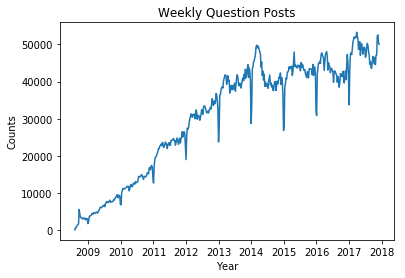

In [28]:
_ = plt.plot(weekly_date_freq)
_ = plt.xlabel('Year')
_ = plt.ylabel('Counts')
_ = plt.title('Weekly Question Posts')
plt.show()

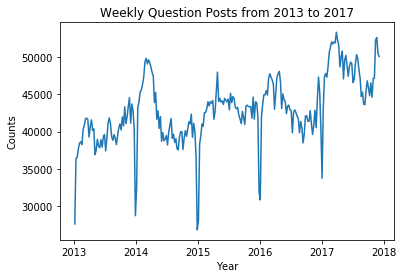

In [29]:
_ = plt.plot(weekly_date_freq["2013":"2017"])
_ = plt.xlabel('Year')
_ = plt.ylabel('Counts')
_ = plt.title('Weekly Question Posts from 2013 to 2017')
plt.show()

In [30]:
weekly_date_freq_13_17 = pd.DataFrame(weekly_date_freq["2013":"2017"])
weekly_date_freq_13_17.columns = ['Count']
weekly_date_freq_13_17['weeknum'] = weekly_date_freq_13_17.index.weekofyear
weekly_date_freq_mean = weekly_date_freq_13_17.groupby('weeknum').mean()

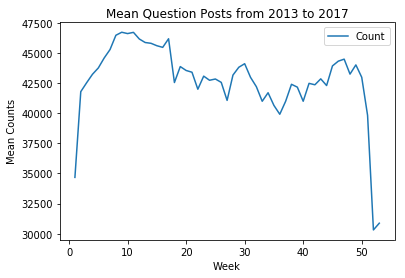

In [31]:
_ = weekly_date_freq_mean.plot()
_ = plt.xlabel('Week')
_ = plt.ylabel('Mean Counts')
_ = plt.title('Mean Question Posts from 2013 to 2017')
plt.show()

Except for the drop during holiday season, there seems to be fewer questions during summer. This could be because of summer break, and there are fewer questions from students. But it's such a small proportion, and most questions are still possibly from working professional.

In [33]:
hourly_freq_13_17 = questions["2013":"2017"].Id.resample('H').count()

In [34]:
hourly_freq_13_17_df = pd.DataFrame(hourly_freq_13_17)
hourly_freq_13_17_df.columns = ['Count']
hourly_freq_13_17_df['DayOfWeek'] = hourly_freq_13_17.index.dayofweek
hourly_freq_13_17_df['Hour'] = hourly_freq_13_17.index.hour
median_hourly_freq_13_17 = hourly_freq_13_17_df.groupby(['DayOfWeek', 'Hour']).Count.median()

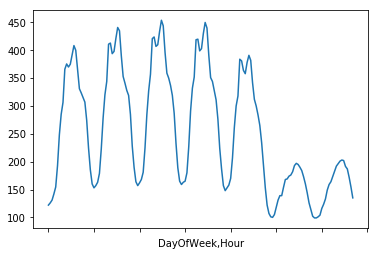

In [35]:
median_hourly_freq_13_17.plot()

In [36]:
weekday_hourly = hourly_freq_13_17_df[hourly_freq_13_17_df.DayOfWeek<5].groupby('Hour').Count.median()
weekend_hourly = hourly_freq_13_17_df[hourly_freq_13_17_df.DayOfWeek>=5].groupby('Hour').Count.median()

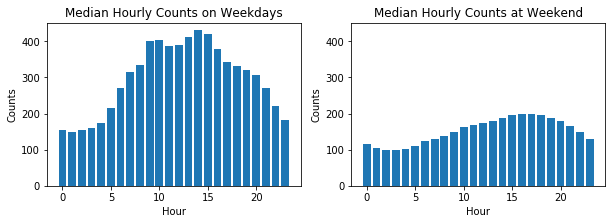

In [37]:
plt.subplots(figsize=(10, 3))
ax = plt.subplot(121)
plt.bar(weekday_hourly.index, weekday_hourly)
plt.xlabel('Hour')
plt.ylabel('Counts')
plt.title('Median Hourly Counts on Weekdays')
plt.subplot(122, sharey=ax)
plt.bar(weekend_hourly.index, weekend_hourly)
plt.xlabel('Hour')
plt.ylabel('Counts')
plt.title('Median Hourly Counts at Weekend')
plt.show()

We can see that there are more questions posted on weekdays than weekends. Since the timestamps were most likely UTC, we can break it up and get more insights from it.

### Answer Counts

In [38]:
questions.AnswerCount.describe()

count    1.499583e+07
mean     1.560372e+00
std      1.456391e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.180000e+02
Name: AnswerCount, dtype: float64

In [39]:
np.sum(questions.AnswerCount == 0)/questions.shape[0]

0.1313654178887283

13% of questions have not received any answers. Break it up by time of creation.

In [41]:
def get_no_answer_pct(array_like):
    return (np.sum(array_like == 0)/len(array_like))
question_no_answer_pct = questions.resample('W').AnswerCount.apply(get_no_answer_pct)

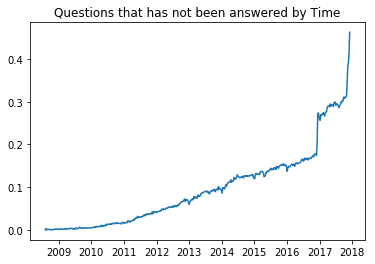

In [42]:
plt.plot(question_no_answer_pct)
plt.title("Questions that has not been answered by Time")
plt.show()

It's quite natural that questions been posted for years are much more likely to get an answer. As of December 2017, questions been posted for over a year will have over 80% of chance to receive an answer. There seems to be funny trend from Jan 2017 onwards and at right tail of data. Zoom in a bit and observe daily trend.

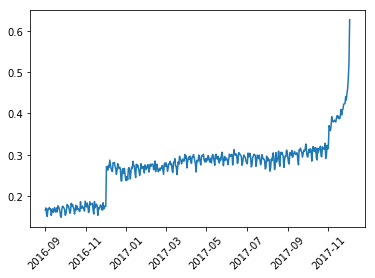

In [43]:
question_no_answer_pct_D = questions["2016-09":"2017-12"].resample('D').AnswerCount.apply(get_no_answer_pct)
plt.plot(question_no_answer_pct_D)
plt.xticks(rotation=45)
plt.show()

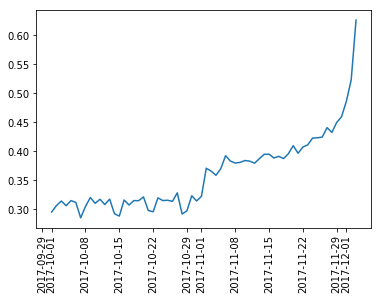

In [44]:
plt.plot(question_no_answer_pct_D["2017-10":"2017-12"])
plt.xticks(rotation=90)
plt.show()

Above 60% of questions posted on December 3rd, 2017 were not answered on the same day! Further, one might expect 30%-40% of questions will hardly find an answer if they are not getting answered within a month. This can be cruisal for constructing a quality measure for questions. In addition, there is a weekly trend that questions posted on weekdays are more likely to get an answer than questions posted on weekends. This might give us some insights about question quality, by comparing weekday vs. weekend questions, since secular trends were no longer a factor.

### View Counts

In [45]:
questions.ViewCount.describe()

count    1.499583e+07
mean     1.982496e+03
std      1.452354e+04
min      1.000000e+00
25%      7.200000e+01
50%      2.400000e+02
75%      9.020000e+02
max      5.686549e+06
Name: ViewCount, dtype: float64

In [47]:
median_weekly_viewcount = questions.resample('W').ViewCount.agg({
    '25%': lambda x: x.quantile(0.25), 
    'median': np.median, 
    '75%': lambda x: x.quantile(0.75)})

/Users/ouou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


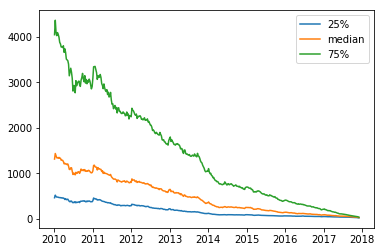

In [48]:
plt.plot(median_weekly_viewcount["2010":"2017"])
plt.legend(labels=median_weekly_viewcount.columns, loc='upper right')
plt.show()

View Counts grow quite linearly by time of exposure, especially after 2014, with some non-linearility due to growth of user activity (So older questions are much more exposed).

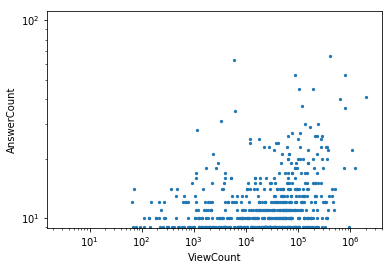

In [50]:
questions.sample(frac=0.01).plot(x="ViewCount",y="AnswerCount",kind="scatter",logx=True,logy=True, marker=".")
plt.show()

More views might not bring you more answers. The correlation is definitely there but not as strong.
We can create answer/view which seems to be an interesting measure to look at.

In [257]:
answer_by_view = questions.AnswerCount/questions.ViewCount
viewcount_cat = pd.cut(questions.ViewCount, bins=[0, 100, 1000, float("inf")],
                labels=["0-100", "100-1000", "1000+"])
plot_df = pd.DataFrame({"answer_by_view":answer_by_view, "viewcount_cat":viewcount_cat})

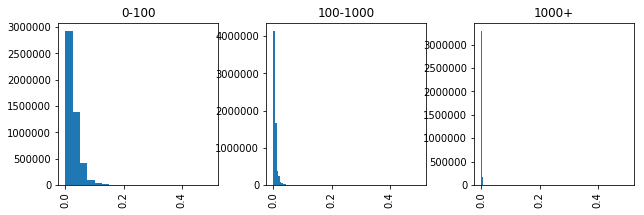

In [258]:
plot_df.hist(column='answer_by_view', by = 'viewcount_cat', bins = 20, figsize=(10, 3), layout=(1, 3), sharex=True)
plt.show()

For questions with much more views, the answer/view is much lower. This makes sense, either because a question is more likely to be answered if it was just posted, or because if a question already got some answers, it's more likely to attract pure viewers.

### Score

In [76]:
questions.Score.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    1.499583e+07
mean     1.899071e+00
std      1.957909e+01
min     -1.470000e+02
1%      -3.000000e+00
5%      -1.000000e+00
10%      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
90%      4.000000e+00
95%      6.000000e+00
99%      2.400000e+01
max      1.990400e+04
Name: Score, dtype: float64

In [89]:
pd.cut(questions.Score, bins=[float("-inf"), -1, 0, 1, 10, 100, float("inf")],
                    labels=["neg", "0", "1", "1-10", "10-100", "100+"]).value_counts(sort = False)

neg        998126
0         6965492
1         3331888
1-10      3294526
10-100     382276
100+        23526
Name: Score, dtype: int64

There are almost 1m negative questions! Even some of them might get answered, those are probably concerning questions. Meanwhile 7m questions are with zero score.

Look at scatter matrix of four numeric measures.

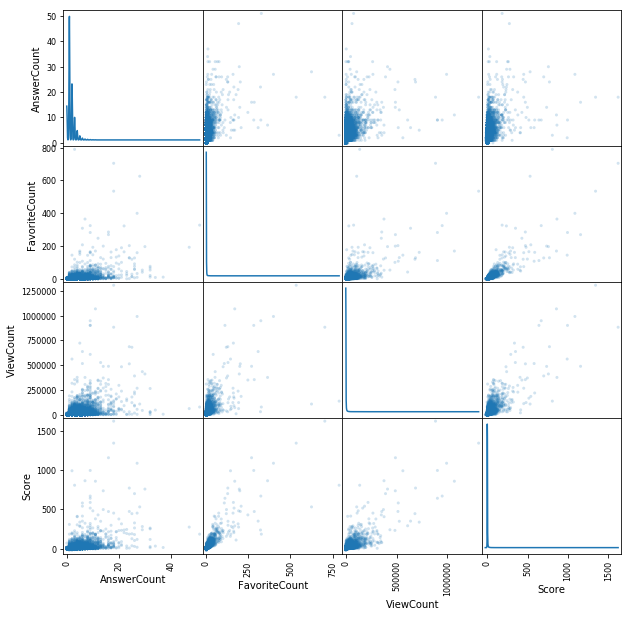

In [93]:
pd.plotting.scatter_matrix(questions[['AnswerCount', 'FavoriteCount', 'ViewCount', 'Score']].sample(frac = 0.01),
                          alpha=0.2, figsize=(10, 10), diagonal='kde', marker=".")

### Tags

In [96]:
# convert tag strings into a list
def parse_tags(tags_str):
    return list(filter(None, re.split('<|>', tags_str)))
tags_list = [parse_tags(item) for item in questions.Tags]

In [98]:
tags_flatten = list(chain.from_iterable(tags_list))
counter = Counter(tags_flatten)

Counter({'c#': 1161039,
         'winforms': 77584,
         'type-conversion': 8256,
         'decimal': 5077,
         'opacity': 2008,
         'html': 710088,
         'css': 508413,
         'css3': 69524,
         'internet-explorer-7': 4160,
         '.net': 261476,
         'datetime': 40828,
         'time': 19041,
         'datediff': 1041,
         'relative-time-span': 7,
         'javascript': 1519856,
         'browser': 20225,
         'timezone': 8030,
         'timezoneoffset': 487,
         'math': 28814,
         'linq': 67193,
         'web-services': 57361,
         '.net-3.5': 5783,
         'mysql': 496302,
         'database': 137325,
         'binary-data': 1079,
         'data-storage': 385,
         'performance': 73923,
         'algorithm': 80938,
         'language-agnostic': 7731,
         'unix': 37035,
         'pi': 452,
         'triggers': 13198,
         'c++': 545586,
         'c': 266251,
         'sockets': 50381,
         'mainframe': 831,
     

In [166]:
len(counter)

50812

In [100]:
counter.most_common(30)

[('javascript', 1519856),
 ('java', 1347905),
 ('c#', 1161039),
 ('php', 1147786),
 ('android', 1053069),
 ('jquery', 884587),
 ('python', 861581),
 ('html', 710088),
 ('c++', 545586),
 ('ios', 541257),
 ('css', 508413),
 ('mysql', 496302),
 ('sql', 417064),
 ('asp.net', 326667),
 ('ruby-on-rails', 284665),
 ('objective-c', 281587),
 ('c', 266251),
 ('.net', 261476),
 ('arrays', 247682),
 ('angularjs', 246016),
 ('json', 219199),
 ('sql-server', 218851),
 ('iphone', 218560),
 ('r', 213835),
 ('node.js', 202665),
 ('ruby', 189763),
 ('ajax', 180110),
 ('regex', 179264),
 ('swift', 173107),
 ('xml', 166778)]

In [167]:
np.quantile(np.array(list(counter.values())).flatten(),
            [0, 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1])

array([1.000000e+00, 1.000000e+00, 2.000000e+00, 1.000000e+01,
       3.700000e+01, 1.550000e+02, 1.728450e+03, 1.134737e+04,
       1.519856e+06])

Most tags were not frequently used. Only about 1% tags was used in about 10,000 questions.

In [201]:
counter_common = dict(counter.most_common(100))
most_common_100 = np.array(list(counter_common.keys())).flatten()

In [192]:
%%time
melt_list = []
for i, item in enumerate(tags_list):
    melt_list += [[i, tag, 1] for tag in item if tag in counter_common]
melt_df = pd.DataFrame(melt_list, columns = ['ind', 'tag', 'count'])
df_matrix = pd.pivot_table(melt_df, index='ind', columns='tag', values='count')

CPU times: user 2min 15s, sys: 3min 22s, total: 5min 38s
Wall time: 5min 54s


In [189]:
def create_sim_matrix(df_matrix):
    matrix = np.array(pd.DataFrame(df_matrix).fillna(0))
    n = len(df_matrix.columns)
    sim_matrix = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            sim_matrix[i][j] = 1-cosine(matrix[:, i],matrix[:, j])
    sim_df = pd.DataFrame(sim_matrix, columns=df_matrix.columns, index=df_matrix.columns)
    return(sim_df)

In [193]:
%%time
sim_df = create_sim_matrix(df_matrix)

CPU times: user 1h 15min 29s, sys: 1h 1min 22s, total: 2h 16min 51s
Wall time: 1h 1min 26s


In [205]:
corr = sim_df.loc[most_common_100, most_common_100]

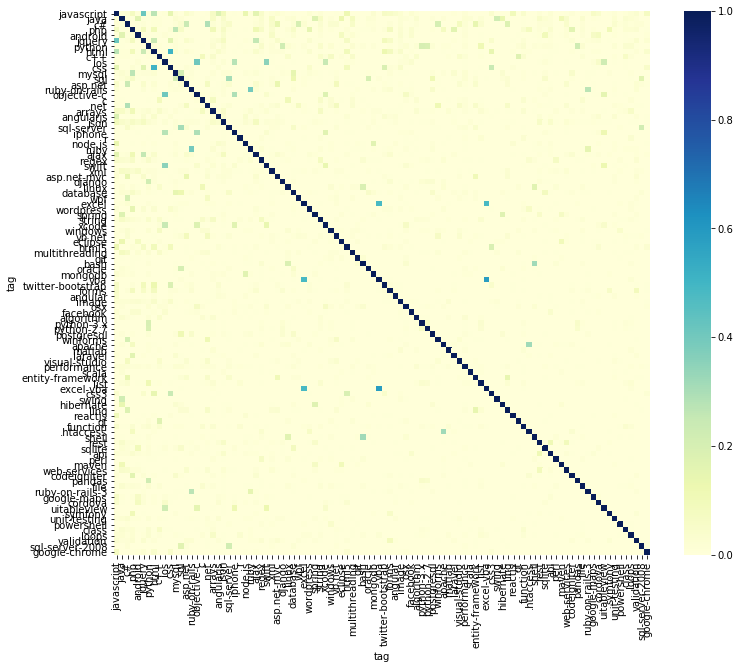

In [210]:
fig, ax = plt.subplots(figsize=(12,10))
sns.diverging_palette
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           cmap="YlGnBu")

In [215]:
sim_df.loc[most_common_100[0:20], most_common_100[0:20]]

tag,javascript,java,c#,php,android,jquery,python,html,c++,ios,css,mysql,sql,asp.net,ruby-on-rails,objective-c,c,.net,arrays,angularjs
tag,,,,,,,,,,,,,,,,,,,,
javascript,1.000000,0.011443,0.016383,0.077709,0.010532,0.417101,0.007277,0.273060,0.001467,0.009290,0.149644,0.014105,0.002859,0.043023,0.020486,0.001691,0.000638,0.004875,0.065827,0.183695
java,0.011443,1.000000,0.005639,0.005313,0.165007,0.004483,0.004384,0.011327,0.007966,0.001545,0.002996,0.027682,0.017437,0.000848,0.000705,0.001232,0.005589,0.003337,0.061816,0.003511
c#,0.016383,0.005639,1.000000,0.002292,0.006889,0.014869,0.001815,0.011714,0.011128,0.003628,0.003545,0.012827,0.037517,0.240219,0.000167,0.000920,0.003070,0.290391,0.021930,0.004002
php,0.077709,0.005313,0.002292,1.000000,0.009622,0.083152,0.003715,0.100076,0.001382,0.003542,0.022851,0.268993,0.057335,0.002471,0.001204,0.001740,0.001436,0.001455,0.104960,0.008009
android,0.010532,0.165007,0.006889,0.009622,1.000000,0.003547,0.002568,0.007192,0.006030,0.017203,0.004369,0.007963,0.004664,0.001463,0.000773,0.000670,0.003061,0.001246,0.010519,0.003167
jquery,0.417101,0.004483,0.014869,0.083152,0.003547,1.000000,0.003332,0.239589,0.000066,0.003265,0.169357,0.015035,0.002127,0.044786,0.021871,0.000120,0.000052,0.003782,0.022740,0.031455
python,0.007277,0.004384,0.001815,0.003715,0.002568,0.003332,1.000000,0.013191,0.009243,0.000801,0.002062,0.015297,0.007702,0.000479,0.000654,0.000627,0.007681,0.001136,0.030261,0.001605
html,0.273060,0.011327,0.011714,0.100076,0.007192,0.239589,0.013191,1.000000,0.000800,0.006404,0.508034,0.023608,0.005873,0.025125,0.009475,0.001536,0.000554,0.003616,0.009300,0.044509
c++,0.001467,0.007966,0.011128,0.001382,0.006030,0.000066,0.009243,0.000800,1.000000,0.003438,0.000313,0.002767,0.001459,0.000294,0.000124,0.004955,0.086314,0.005491,0.049790,0.000044


This is mainly to check if there were very strongly correlated tags. Among the top 20 common tags, we can see some patterns, such as `html` and `css` are strongly associated. Running a simply clustering algorithm to capture such patterns.

In [259]:
from sklearn.cluster import SpectralClustering
cid = SpectralClustering(affinity='precomputed',n_clusters=20).fit_predict(sim_df.loc[most_common_100, most_common_100])

In [268]:
cluster_dict = dict()
for i in np.arange(min(cid), max(cid)):
    cluster_dict[most_common_100[cid == i][0]] = most_common_100[cid == i].tolist()
cluster_dict    

{'javascript': ['javascript',
  'jquery',
  'asp.net',
  'angularjs',
  'json',
  'ajax',
  'xml',
  'angular',
  'reactjs',
  'unit-testing'],
 'java': ['java', 'multithreading', 'image', 'swing'],
 'sql': ['sql', 'database', 'spring', 'oracle', 'postgresql', 'hibernate'],
 'python': ['python', 'django', 'python-3.x', 'python-2.7', 'pandas'],
 'sql-server': ['sql-server', 'sql-server-2008'],
 'apache': ['apache', '.htaccess'],
 'eclipse': ['eclipse', 'git', 'maven'],
 'c++': ['c++', 'qt'],
 'ios': ['ios',
  'objective-c',
  'iphone',
  'swift',
  'xcode',
  'osx',
  'uitableview'],
 'excel': ['excel', 'vba', 'excel-vba'],
 'rest': ['rest', 'api', 'web-services'],
 'php': ['php',
  'mysql',
  'wordpress',
  'forms',
  'laravel',
  'codeigniter',
  'symfony',
  'validation'],
 'asp.net-mvc': ['asp.net-mvc', 'entity-framework', 'linq'],
 'c#': ['c#',
  '.net',
  'wpf',
  'windows',
  'vb.net',
  'winforms',
  'visual-studio',
  'powershell'],
 'html': ['html',
  'css',
  'html5',
  'twit

So far the clustering result seems reasonable. This will help to reduce number of topics for questions we have. Re-visit some trends above spliting by each topic group.

In [275]:
def get_tag_cluster(cluster_name, tags_list):
    return([not set(tags).isdisjoint(cluster_dict[cluster_name]) for tags in tags_list])

In [282]:
%%time
cluster_lst = [get_tag_cluster(cluster_name, tags_list) for cluster_name in cluster_dict.keys()]

CPU times: user 2min 49s, sys: 27.4 s, total: 3min 17s
Wall time: 3min 37s


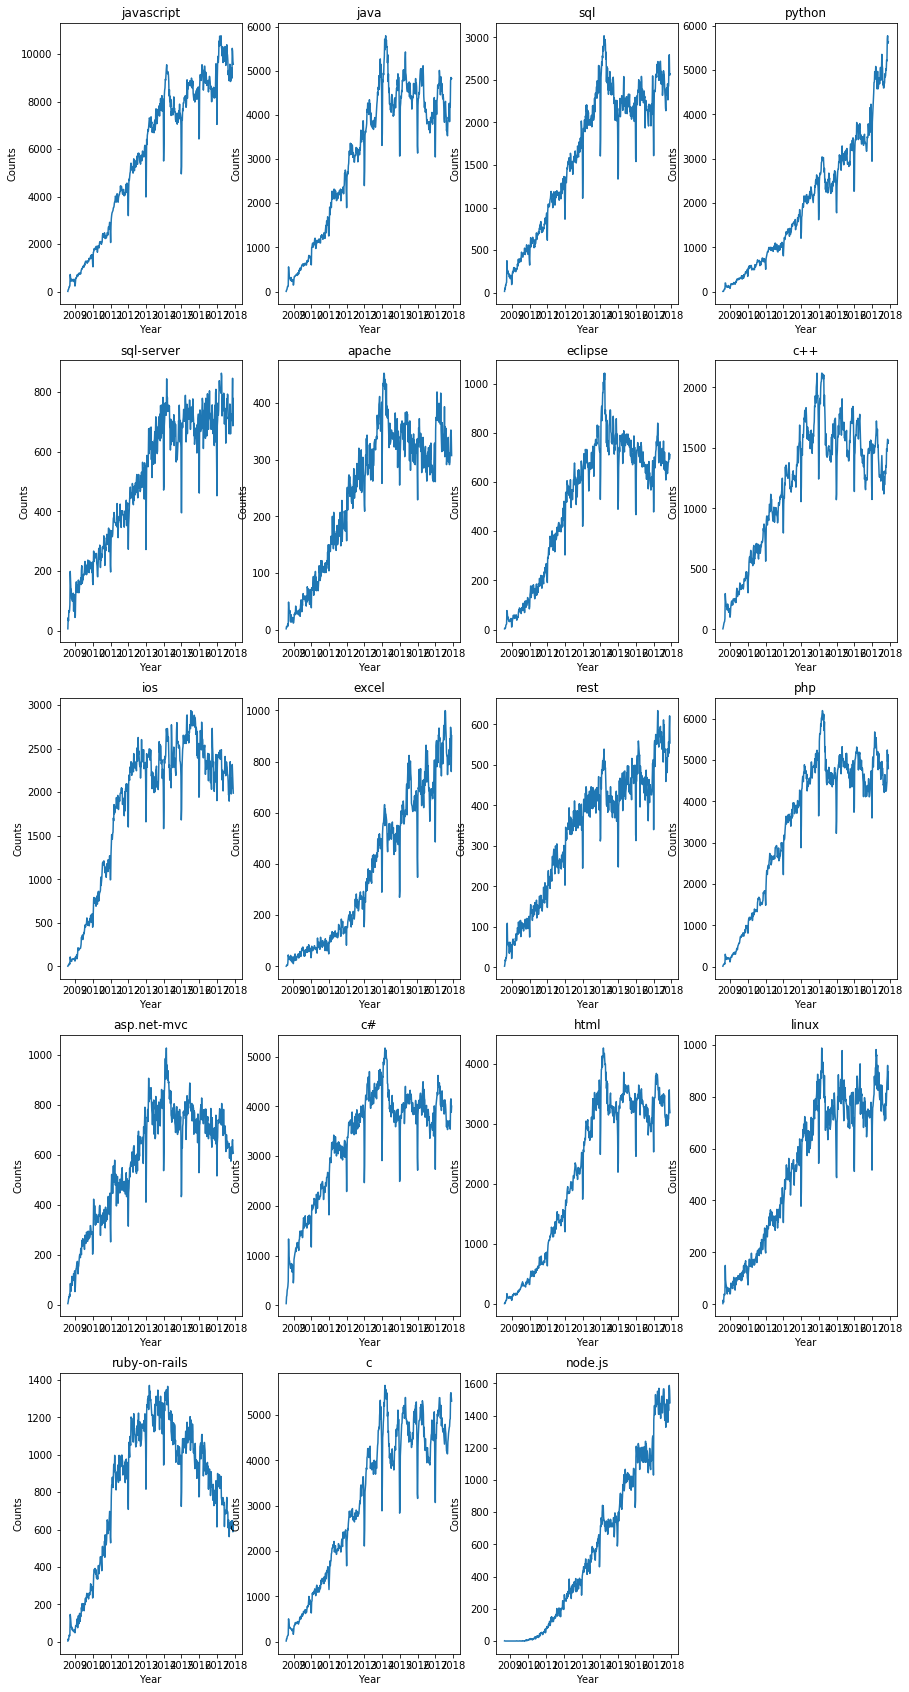

In [294]:
plt.subplots(figsize = (15, 30))
for i, item in enumerate(list(cluster_dict.keys())):
    plt.subplot(5, 4, i + 1)
    plt.plot(questions['Id'][cluster_lst[i]].resample('W').count())
    plt.xlabel('Year')
    plt.ylabel('Counts')
    plt.title(item)
plt.show()

/Users/ouou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


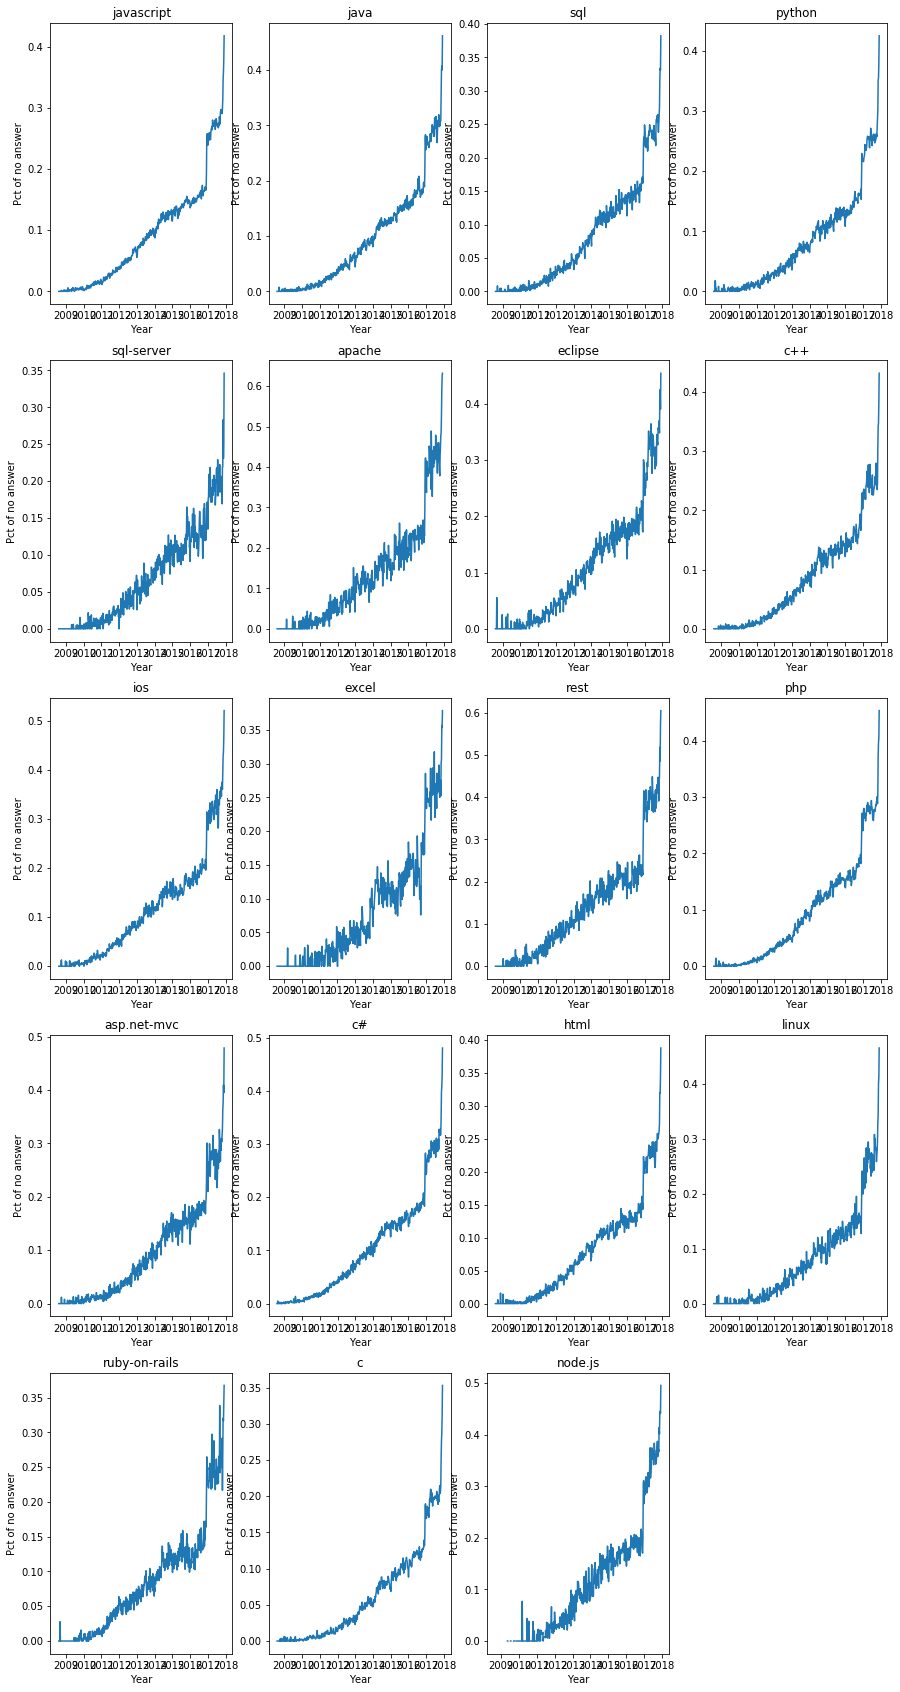

In [295]:
plt.subplots(figsize = (15, 30))
for i, item in enumerate(list(cluster_dict.keys())):
    plt.subplot(5, 4, i + 1)
    plt.plot(questions[cluster_lst[i]].resample('W').AnswerCount.apply(get_no_answer_pct))
    plt.xlabel('Year')
    plt.ylabel('Pct of no answer')
    plt.title(item)
plt.show()

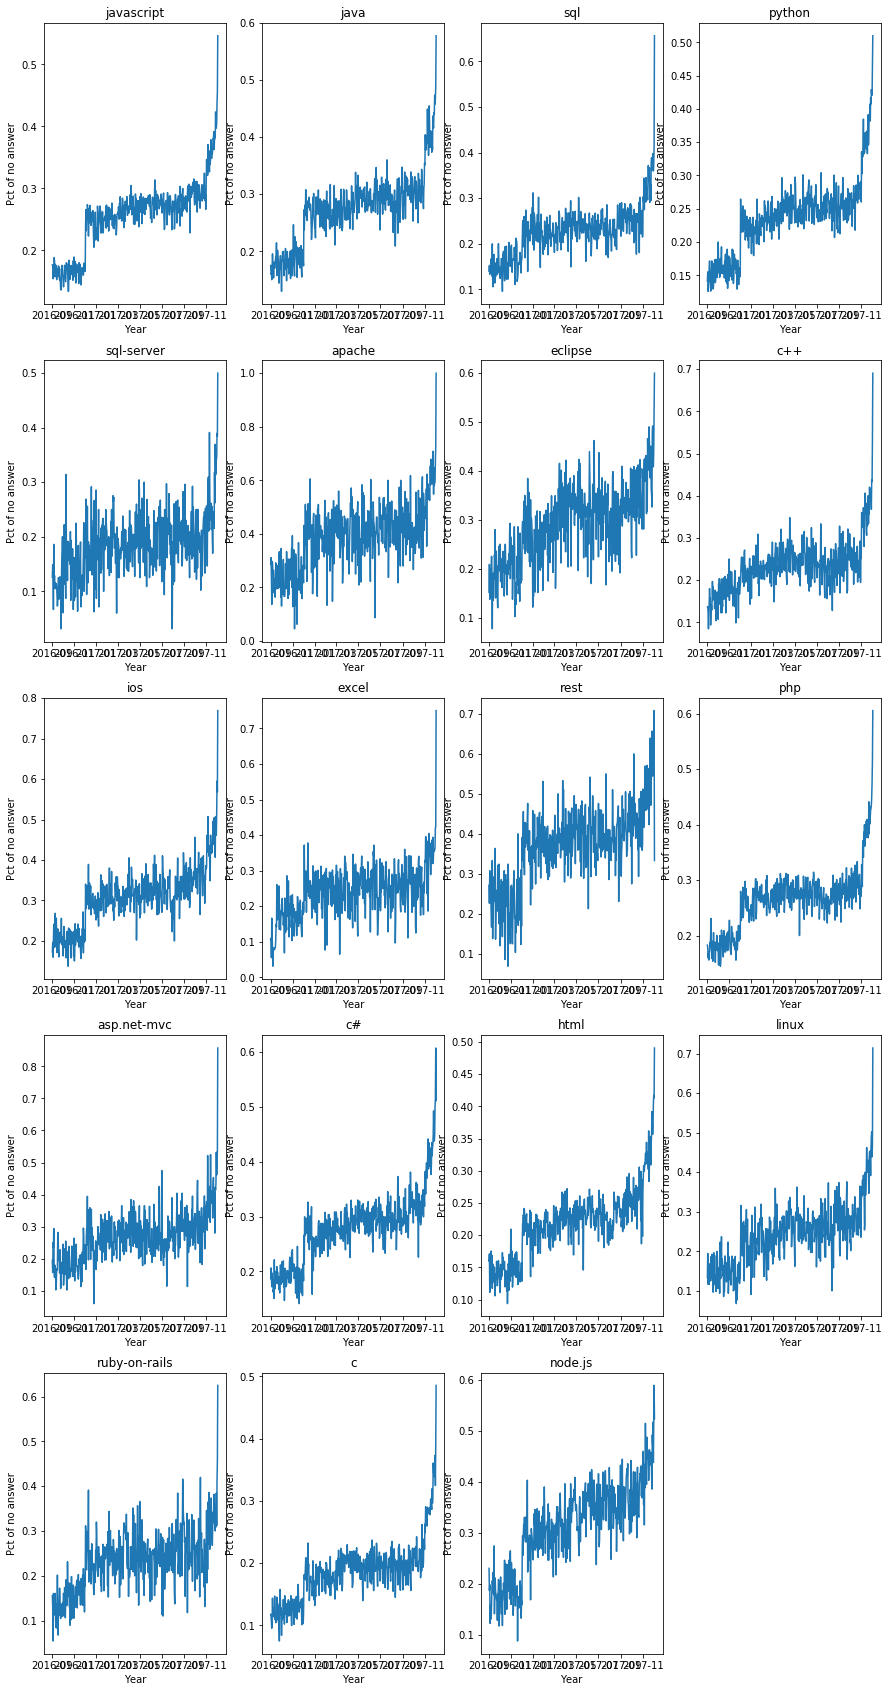

In [296]:
plt.subplots(figsize = (15, 30))
for i, item in enumerate(list(cluster_dict.keys())):
    plt.subplot(5, 4, i + 1)
    plt.plot(questions[cluster_lst[i]]["2016-09":"2017-12"].resample('D').AnswerCount.apply(get_no_answer_pct))
    plt.xlabel('Year')
    plt.ylabel('Pct of no answer')
    plt.title(item)
plt.show()

Looking at number of questions, different categories follow mostly the same trend, with some start declining and lose interest among the community (ruby) and some increased even further (python, javascript, node.js).

There is some but not too much different regarding how likely were questions got answered. A lot questions are expected to be answered within a month, otherwise will hardly find an answer in short term. The weird jump at around Jan 2017 exist for all categories of questions. Some categories are easier to find an answer (sql, sql-server, c(including a bunch of basic tags), 80% answer rate at first month), while questions from some other categories are harder (apache, 60% answer rate at first month).

### Users
Users can be an interesting but separate topic. There is no plan to closely looking into users dataset, here just trying to extract location information for each user.

In [298]:
%%time
users = pd.read_csv(file_path+"user.csv", index_col="Id", 
                    parse_dates=["CreationDate", "LastAccessDate"])

/Users/ouou/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


CPU times: user 36.6 s, sys: 7.87 s, total: 44.4 s
Wall time: 48 s


In [300]:
users.Location.describe()

count     1681659
unique     121224
top         India
freq        41377
Name: Location, dtype: object

In [323]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [315]:
loc_str = [str.strip(str(loc).split(',')[-1]) for loc in users.Location]

In [432]:
loc_str = ["United States" if loc in states.keys() else loc for loc in loc_str]
loc_str = ["United States" if loc in states.values() else loc for loc in loc_str]
loc_str = ["United States" if loc == "USA" else loc for loc in loc_str]
loc_str = ["United Kingdom" if loc == "UK" else loc for loc in loc_str]
loc_str = ["United Kingdom" if loc == "UK" else loc for loc in loc_str]
loc_str = ["China" if loc[-4:] == " Shi" else loc for loc in loc_str]
loc_str = ["China" if loc == "china" else loc for loc in loc_str]
# aggregate into bigger regions
loc_str = ['NA' if loc in ["United States", "Canada", 'Mexico', 'México'] else loc for loc in loc_str]
loc_str = ['EA' if loc in ["China", "Indonesia", "Philippines", "Singapore", 
                           "Taiwan", "South Korea", "Malaysia", 'Vietnam', 'Việt Nam', 'Hong Kong',
                          'Thailand', 'Chennai', 'Japan', "Hong Kong"] else loc for loc in loc_str]
loc_str = ['SA' if loc in ["India", "Pakistan", "Bangladesh", "Sri Lanka", 'Iran', 
                           'Nepal', "Delhi", "New Delhi"] else loc for loc in loc_str]
loc_str = ['EU' if loc in ["United Kingdom", "Germany", "France", "Russia", 
                           'Netherlands', "Poland", "Ukraine",
                          "Spain", "Italy", "Sweden", "Deutschland",
                          "Romania", "Belgium", "Switzerland", "Portugal",
                          "Polska", "Ireland", "Italia", "Türkiye", 'Turkey', 'Israel', 
                           "Denmark", "España", "Norway", "Greece",
                           "Austria", "Finland", "Czech Republic", "Bulgaria",
                            "London", "Belarus", "Hungary", "Nederland"] else loc for loc in loc_str]


In [433]:
Counter(loc_str).most_common(20)

[('nan', 6442278),
 ('EU', 409114),
 ('NA', 384157),
 ('SA', 312549),
 ('EA', 137265),
 ('Australia', 28370),
 ('Brazil', 21055),
 ('Brasil', 15045),
 ('Download Link:', 14388),
 ('South Africa', 10288),
 ('Egypt', 10171),
 ('Argentina', 8070),
 ('New Zealand', 6762),
 ('Nigeria', 6333),
 ('Colombia', 5363),
 ('Bangalore', 5305),
 ('Россия', 5242),
 ('Chile', 3845),
 ('Kenya', 3639),
 ('Morocco', 2827)]

In [345]:
users.head(10)

,AccountId,DisplayName,Age,CreationDate,LastAccessDate,Location,Reputation,UpVotes,DownVotes,Views
Id,,,,,,,,,,
-1,-1,Community,NaN,2008-07-31 00:00:00.000,2008-08-26 00:16:53.810,on the server farm,1,225495,890820,649
1,1,Jeff Atwood,47.0,2008-07-31 14:22:31.287,2017-11-13 11:01:24.840,"El Cerrito, CA",42510,3348,1308,327890
2,2,Geoff Dalgas,40.0,2008-07-31 14:22:31.287,2017-12-01 22:41:28.983,"Corvallis, OR",3200,642,88,22508
3,3,Jarrod Dixon,38.0,2008-07-31 14:22:31.287,2017-12-02 07:08:31.943,"Raleigh, NC, United States",13138,7003,100,23373
4,4,Joel Spolsky,NaN,2008-07-31 14:22:31.317,2017-12-02 00:28:55.120,"New York, NY",27792,786,96,71109
5,5,Jon Galloway,47.0,2008-07-31 14:22:31.317,2017-11-30 21:05:02.703,"San Diego, CA",37634,780,34,10978
8,6,Eggs McLaren,NaN,2008-07-31 21:33:24.057,2012-10-15 22:00:45.510,NaN,942,12,9,5914
9,7,Kevin Dente,46.0,2008-07-31 21:35:26.517,2017-11-30 23:00:29.633,"Oakland, CA",13314,45,4,4528
10,8,Sneakers O'Toole,38.0,2008-07-31 21:57:06.240,2012-06-19 19:35:43.433,"Lakehead, CA",101,0,0,3389


In [340]:
users.describe()

,AccountId,Age,Reputation,UpVotes,DownVotes,Views
count,8.123937e+06,701955.000000,8.123937e+06,8.123937e+06,8.123937e+06,8.123937e+06
mean,6.129152e+06,30.798822,1.130989e+02,1.214454e+01,1.547752e+00,1.449911e+01
std,3.572510e+06,8.682574,2.236946e+03,1.632540e+02,3.254881e+02,6.601804e+02
min,-1.000000e+00,5.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.048437e+06,25.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.022259e+06,29.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.251048e+06,34.000000,8.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
max,1.241585e+07,147.000000,9.904020e+05,2.254950e+05,8.908200e+05,1.499608e+06


In [438]:
users['LocationCleaned'] = loc_str

In [439]:
plot_df = pd.merge(questions[['OwnerUserId']].reset_index(),
                  users[['LocationCleaned']].reset_index(),
                  left_on = "OwnerUserId", right_on = "Id", )
plot_df = plot_df.set_index('CreationDate')["2013":"2017"]
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10934844 entries, 2013-10-16 17:16:29.257000 to 2017-12-03 05:00:08.563000
Data columns (total 3 columns):
OwnerUserId        int64
Id                 int64
LocationCleaned    object
dtypes: int64(2), object(1)
memory usage: 333.7+ MB


In [442]:
top_countries = ['EU', 'NA', 'SA', 'EA']
plot_counts = plot_df[plot_df.LocationCleaned.isin(top_countries)] \
    .groupby('LocationCleaned').resample('H')[['Id']].count()
plot_counts.columns = ['Count']
plot_counts = plot_counts.reset_index().set_index('CreationDate')
plot_counts['DayOfWeek'] = plot_counts.index.dayofweek
plot_counts['Hour'] = plot_counts.index.hour
weekday_hourly = plot_counts[plot_counts.DayOfWeek<5].groupby(['LocationCleaned', 'Hour']) \
    .Count.median().reset_index()
weekend_hourly = plot_counts[plot_counts.DayOfWeek>=5].groupby(['LocationCleaned', 'Hour']) \
    .Count.median().reset_index()

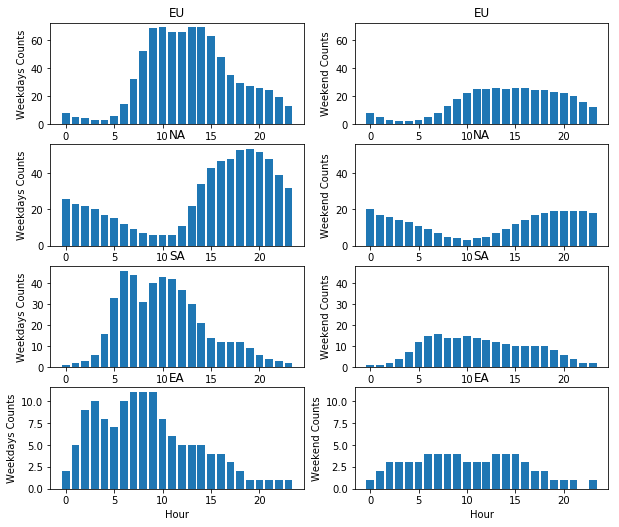

In [443]:
plt.subplots(figsize=(10, 22))
for i, country in enumerate(top_countries):
    ax = plt.subplot(10, 2, 2*i+1)
    plt.bar(weekday_hourly[weekday_hourly.LocationCleaned == country].Hour, 
            weekday_hourly[weekday_hourly.LocationCleaned == country].Count)
    plt.xlabel('Hour')
    plt.ylabel('Weekdays Counts')
    plt.title(country)
    plt.subplot(10, 2, 2*i+2, sharey=ax)
    plt.bar(weekend_hourly[weekend_hourly.LocationCleaned == country].Hour, 
            weekend_hourly[weekend_hourly.LocationCleaned == country].Count)
    plt.xlabel('Hour')
    plt.ylabel('Weekend Counts')
    plt.title(country)
plt.show()

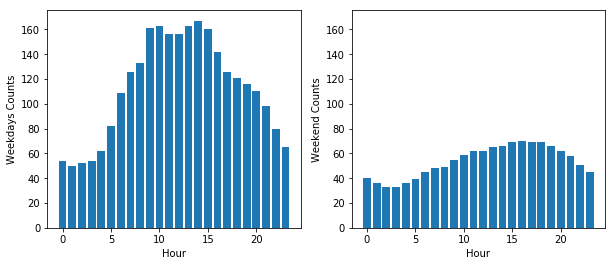

In [444]:
plot_counts = plot_df[plot_df.LocationCleaned != "nan"].resample('H')[['Id']].count()
plot_counts.columns = ['Count']
plot_counts = plot_counts.reset_index().set_index('CreationDate')
plot_counts['DayOfWeek'] = plot_counts.index.dayofweek
plot_counts['Hour'] = plot_counts.index.hour
weekday_hourly = plot_counts[plot_counts.DayOfWeek<5].groupby(['Hour']).Count.median().reset_index()
weekend_hourly = plot_counts[plot_counts.DayOfWeek>=5].groupby(['Hour']).Count.median().reset_index()
plt.subplots(figsize=(10, 4))
ax = plt.subplot(1, 2, 1)
plt.bar(weekday_hourly.Hour, 
        weekday_hourly.Count)
plt.xlabel('Hour')
plt.ylabel('Weekdays Counts')
plt.subplot(1, 2, 2, sharey=ax)
plt.bar(weekend_hourly.Hour, 
        weekend_hourly.Count)
plt.xlabel('Hour')
plt.ylabel('Weekend Counts')
plt.show()

Basically, this is a joint distribution of daily activity time. It peaks at UTC = 10 - 15 mainly because EU has the largest user basis than all other regions.

### Time to first answer

In [449]:
%%time
answers = pd.read_csv(file_path+"answer_info.csv", parse_dates=["CreationDate", "LastActivityDate"])

CPU times: user 1min 29s, sys: 38.9 s, total: 2min 8s
Wall time: 2min 16s


In [453]:
answers.rename(columns = {"CreationDate": "AnswerDate"}, inplace = True)
answers.head()

,Id,AnswerDate,LastActivityDate,CommentCount,Score,OwnerUserId,ParentId
0,7,2008-07-31 22:17:57.883,2012-10-14 11:50:16.703,0,379,9,4
1,12,2008-07-31 23:56:41.303,2014-02-18 14:19:35.770,10,312,1,11
2,18,2008-08-01 05:12:44.193,2016-06-02 05:56:26.060,2,45,0,17
3,21,2008-08-01 08:57:27.280,2008-08-01 12:35:11.707,0,31,13,9
4,22,2008-08-01 12:07:19.500,2008-08-01 15:26:37.087,0,24,17,9


In [501]:
result = pd.merge(questions.reset_index()[['CreationDate', 'Id', 'AcceptedAnswerId']], 
                  answers[['Id', 'AnswerDate', 'ParentId']].groupby('ParentId').min(), 
                  how = "left", left_on = "Id", right_on = "ParentId", suffixes=('', 'Answer'))

In [502]:
result.rename(columns={"AnswerDate":"FirstAnswerDate"},inplace=True)
result = pd.merge(result,
                  answers[['Id', 'AnswerDate']], 
                  how = "left", left_on = "AcceptedAnswerId", right_on = "Id", suffixes=('', 'AcceptedAnswer'))
result.rename(columns={"AnswerDate":"FirstAcceptedAnswerDate"},inplace=True)

In [503]:
result.head()

,CreationDate,Id,AcceptedAnswerId,IdAnswer,FirstAnswerDate,IdAcceptedAnswer,FirstAcceptedAnswerDate
0,2008-07-31 21:42:52.667,4,7,7.0,2008-07-31 22:17:57.883,7.0,2008-07-31 22:17:57.883
1,2008-07-31 22:08:08.620,6,31,31.0,2008-08-01 12:22:51.593,31.0,2008-08-01 12:22:51.593
2,2008-07-31 23:40:59.743,9,1404,21.0,2008-08-01 08:57:27.280,1404.0,2008-08-04 16:50:06.170
3,2008-07-31 23:55:37.967,11,1248,12.0,2008-07-31 23:56:41.303,1248.0,2008-08-04 13:57:26.097
4,2008-08-01 00:42:38.903,13,0,29.0,2008-08-01 12:19:17.417,NaN,NaT


In [504]:
result['TimeToAnswer'] = result['FirstAnswerDate'] - result['CreationDate']

In [481]:
result['TimeToAnswer'].describe()

count                       13025900
mean         12 days 05:49:42.738879
std          79 days 14:15:30.511515
min      -2270 days +01:51:53.053000
25%           0 days 00:07:19.263000
50%           0 days 00:26:08.320000
75%           0 days 04:09:09.960500
max        3194 days 04:13:59.513000
Name: TimeToAnswer, dtype: object

In [510]:
result2 = result[result['TimeToAnswer'].notna()]
result2 = result2[pd.to_numeric(result['TimeToAnswer']) < 0]
result2

/Users/ouou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,CreationDate,Id,AcceptedAnswerId,IdAnswer,FirstAnswerDate,IdAcceptedAnswer,FirstAcceptedAnswerDate,TimeToAnswer
4902,2008-09-04 23:26:44.767,44965,0,2538.0,2008-08-05 16:28:41.483,NaN,NaT,-31 days +17:01:56.716000
8849,2008-09-16 20:58:35.487,77005,77336,76867.0,2008-09-16 20:47:19.897,77336.0,2008-09-16 21:30:26.377,-1 days +23:48:44.410000
11419,2008-09-19 08:10:54.997,100420,0,15782.0,2008-08-19 06:00:46.497,NaN,NaT,-32 days +21:49:51.500000
22507,2008-10-09 00:13:25.910,185451,185473,169969.0,2008-10-04 08:20:19.143,185473.0,2008-10-09 00:24:09.850,-5 days +08:06:53.233000
23613,2008-10-10 18:02:54.430,192479,192656,98251.0,2008-09-19 00:14:48.447,192656.0,2008-10-10 18:58:34.520,-22 days +06:11:54.017000
26569,2008-10-17 07:38:24.577,211329,211334,142311.0,2008-09-26 22:15:52.187,211334.0,2008-10-17 07:42:27.313,-21 days +14:37:27.610000
27195,2008-10-18 23:34:02.570,215718,215731,35288.0,2008-08-29 20:56:12.433,215731.0,2008-10-18 23:39:35.210,-51 days +21:22:09.863000
27482,2008-10-20 08:46:11.100,217805,217814,122706.0,2008-09-23 18:09:49.740,217814.0,2008-10-20 08:53:13.910,-27 days +09:23:38.640000
27579,2008-10-20 12:33:38.643,218264,0,76645.0,2008-09-16 20:29:41.157,NaN,NaT,-34 days +07:56:02.514000
48089,2008-12-04 11:13:02.347,340237,341331,337910.0,2008-12-03 17:05:25.613,341331.0,2008-12-04 17:01:37.603,-1 days +05:52:23.266000


In [505]:
result[result['FirstAnswerDate'].notna()]

,CreationDate,Id,AcceptedAnswerId,IdAnswer,FirstAnswerDate,IdAcceptedAnswer,FirstAcceptedAnswerDate,TimeToAnswer
0,2008-07-31 21:42:52.667,4,7,7.0,2008-07-31 22:17:57.883,7.0,2008-07-31 22:17:57.883,0 days 00:35:05.216000
1,2008-07-31 22:08:08.620,6,31,31.0,2008-08-01 12:22:51.593,31.0,2008-08-01 12:22:51.593,0 days 14:14:42.973000
2,2008-07-31 23:40:59.743,9,1404,21.0,2008-08-01 08:57:27.280,1404.0,2008-08-04 16:50:06.170,0 days 09:16:27.537000
3,2008-07-31 23:55:37.967,11,1248,12.0,2008-07-31 23:56:41.303,1248.0,2008-08-04 13:57:26.097,0 days 00:01:03.336000
4,2008-08-01 00:42:38.903,13,0,29.0,2008-08-01 12:19:17.417,NaN,NaT,0 days 11:36:38.514000
5,2008-08-01 00:59:11.177,14,0,33.0,2008-08-01 12:26:39.773,NaN,NaT,0 days 11:27:28.596000
6,2008-08-01 04:59:33.643,16,12446,84.0,2008-08-01 14:10:55.757,12446.0,2008-08-15 16:27:31.600,0 days 09:11:22.114000
7,2008-08-01 05:09:55.993,17,26,18.0,2008-08-01 05:12:44.193,26.0,2008-08-01 12:16:22.167,0 days 00:02:48.200000
8,2008-08-01 05:21:22.257,19,531,71.0,2008-08-01 13:37:59.723,531.0,2008-08-02 18:22:52.690,0 days 08:16:37.466000
9,2008-08-01 12:12:19.350,24,49,49.0,2008-08-01 13:02:51.900,49.0,2008-08-01 13:02:51.900,0 days 00:50:32.550000


NameError: name 'result' is not defined